# Mesh Curvature Instance Segmentation Tutorial

---

In [1]:
import numpy as np
import open3d as o3d
import mesh_curvature_instance_segmentation as seg

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
fn = "sandbox_subset.ply"
mesh = o3d.io.read_triangle_mesh(fn)
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

![sandbox_subset](sandbox_subset.png)

In [3]:
mesh_seg, tri_seg, vrt_seg, colors = seg.instance_segmentation(mesh,
    surface_area_threshold=1e-4,
    erosion=True,
    erosion_iterations=1,
    dilation=True,
    dilation_iterations=3,
)

total surface area: 0.25284569114589295
average surface area per triangle: 7.591080745313413e-08
surface area threshold in number of triangles: 1317
compute surface normal divergence as mean surface curvature
removing large vertical triangles
erode potential segments in order to remove bridges
filter by sphericity


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 145/145 [00:00<00:00, 162.93it/s]


dilation, undo erosion of segments


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 146005/146005 [00:00<00:00, 206546.87it/s]


fill topological holes in segments


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5663/5663 [00:04<00:00, 1409.65it/s]


final components as segments
neighborhood graph based segment coloring


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 143/143 [00:00<00:00, 669.10it/s]


In [4]:
o3d.visualization.draw_geometries([mesh_seg])

In [5]:
rgb_map = np.array(
    [[1.000, 0.871, 0.678],
     [0.973, 0.718, 0.600],
     [0.737, 0.839, 0.753],
     [0.941, 0.502, 0.502],
     [0.733, 0.608, 0.718],
     [0.690, 0.678, 0.686],
     [0.275, 0.753, 0.843],
     [0.000, 0.557, 0.788],
     [0.392, 0.898, 0.898]]
)

mesh_seg.vertex_colors = o3d.utility.Vector3dVector(rgb_map[colors])
o3d.visualization.draw_geometries([mesh, mesh_seg])

![sandbox_subset_segments](sandbox_subset_segments_both.png)

In [6]:
o3d.io.write_triangle_mesh(fn[:-4] + "_segments.ply", mesh_seg, compressed=True)
np.save(fn[:-4] + "_segment_label_facets.npy", tri_seg)
np.save(fn[:-4] + "_segment_label_vertex.npy", vrt_seg)
np.save(fn[:-4] + "_segment_label_colors.npy", colors)

## Segment Statistics

In [7]:
# read mesh and segments
fn = "sandbox_subset.ply"
mesh = o3d.io.read_triangle_mesh(fn)
vrt_seg = np.load(fn[:-4] + "_segment_label_vertex.npy")
colors = np.load(fn[:-4] + "_segment_label_colors.npy")

# compute statistics
stats_dict = seg.segment_statistics(mesh, vrt_seg, colors, write_segments=True)

# write statistics to a CSV file
seg.dict_to_csv(fn[:-4] + "_segment_stats.csv", stats_dict)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 143/143 [00:15<00:00,  8.94it/s]


In [8]:
# also individual segments are stored with "write_segments=True"
segment = o3d.io.read_triangle_mesh("segment_0004.ply")
segment.compute_vertex_normals()
o3d.visualization.draw_geometries([segment])

![segment_0004](segment_0004.png)

In [9]:
import pandas as pd


# read segment statistics
df = pd.read_csv("sandbox_subset_segment_stats.csv")
df

,Unnamed: 0,segment id,segment color,centroid x,centroid y,centroid z,A axis,B axis,C axis,yaw,...,red mean,green mean,blue mean,red std,green std,blue std,mesh surface area,convex hull area,convex hull volume,convex hull sphericity
0,0,0,0,0.054029,-0.350354,0.043422,0.048460,0.043135,0.041514,159.870218,...,0.535077,0.525150,0.522698,0.236115,0.237027,0.234529,0.001450,0.004974,2.510016e-05,0.833561
1,1,1,1,0.082773,-0.312401,0.074019,0.067775,0.060272,0.047835,-142.223141,...,0.676112,0.673296,0.679633,0.200343,0.206334,0.212999,0.007791,0.010917,9.659942e-05,0.932567
2,2,2,0,0.041097,-0.218386,0.075632,0.147602,0.085023,0.062595,143.065490,...,0.421323,0.379501,0.347311,0.163206,0.150540,0.145457,0.015809,0.028702,3.135480e-04,0.777626
3,3,3,0,0.248462,-0.397295,0.038053,0.032689,0.024340,0.020789,-114.963766,...,0.427903,0.376395,0.316622,0.156382,0.150922,0.144875,0.001234,0.002028,7.535814e-06,0.916598
4,4,4,0,0.100860,-0.428295,0.094282,0.143096,0.099409,0.092212,153.515867,...,0.400989,0.348031,0.296600,0.142184,0.133206,0.124984,0.027174,0.036250,5.819676e-04,0.929911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,138,138,3,0.192755,-0.230214,0.032917,0.013043,0.012149,0.006046,179.342331,...,0.095234,0.078190,0.069974,0.020318,0.016580,0.017173,0.000159,0.000324,3.678617e-07,0.766826
139,139,139,1,0.216206,-0.179946,0.056425,0.034508,0.018550,0.007932,-166.070641,...,0.459734,0.377767,0.289324,0.166011,0.142551,0.118951,0.000533,0.001268,2.302651e-06,0.665118
140,140,140,1,0.208259,-0.231635,0.043069,0.030830,0.009887,0.009478,-139.591401,...,0.205121,0.187798,0.162349,0.040740,0.038837,0.038826,0.000263,0.000665,9.927177e-07,0.724110
141,141,141,3,0.044371,-0.464072,0.045432,0.019612,0.011763,0.008229,-113.376312,...,0.363890,0.302165,0.223463,0.250162,0.227355,0.201757,0.000127,0.000387,4.710451e-07,0.756146


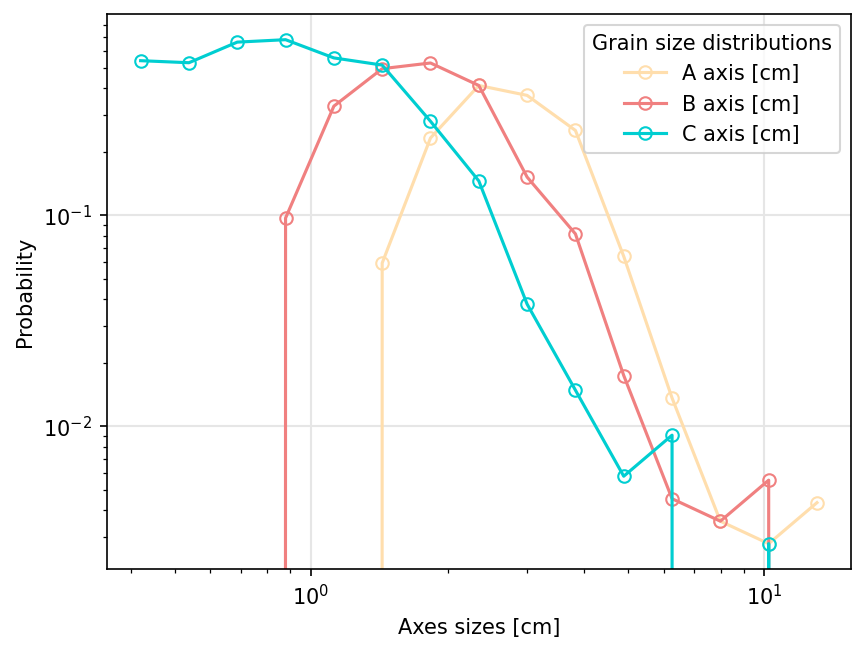

In [10]:
# colors
cc = "darkturquoise"
cb = "lightcoral"
ca = "navajowhite"

# read axes and convert to cm
dc = df["C axis"].to_numpy() * 100
db = df["B axis"].to_numpy() * 100
da = df["A axis"].to_numpy() * 100

# logarithmic bins
n = 15
dmin = min(min(dc.min(), db.min()), da.min())
dmax = max(max(dc.max(), db.max()), da.max())
bins = np.logspace(np.log10(dmin), np.log10(dmax), n*2+1)[::2]
binc = np.logspace(np.log10(dmin), np.log10(dmax), n*2+1)[1::2]

# histograms
pda, _ = np.histogram(da, bins=bins, density=True)
pdb, _ = np.histogram(db, bins=bins, density=True)
pdc, _ = np.histogram(dc, bins=bins, density=True)

# figure
pl.figure(dpi=150)
pl.loglog(binc, pda, marker="o", mfc="none", color=ca, label="A axis [cm]")
pl.loglog(binc, pdb, marker="o", mfc="none", color=cb, label="B axis [cm]")
pl.loglog(binc, pdc, marker="o", mfc="none", color=cc, label="C axis [cm]")
pl.ylabel("Probability")
pl.xlabel("Axes sizes [cm]")
pl.grid(lw=1, color="0.9")
pl.legend(
    loc="upper right",
    title="Grain size distributions"
)
pl.show()